<a href="https://colab.research.google.com/github/HarisBalaji/Product_Recommendation_Engine/blob/main/cater_recom_engi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [1]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Parts_Recommendation_CaseStudy.csv']))
df

,INVOICE_ID,INVOICE_DATE,PART_NUMBER,SERVICE,PART_NAME,SALES_MODEL
0,U370/9670114009-3350006692,17-06-2020,5O7126,Drivetrain-Brakes-Rebuild,Screen Filters,289Y
1,M060/M060-3073812939,30-04-2020,3N6968,Drivetrain-Brakes-Rebuild,Gaskets,289Y
2,U370/9670558168-3300504198,20-07-2021,1U0931,Drivetrain-Brakes-Rebuild,"Seals, Gaskets, and O-Rings",289Y
3,W700/CTS33550363,14-08-2020,0L0181,Drivetrain-Axle-Rebuild,Bolts and Screws,488V
4,C090/7F87195,30-04-2022,30K3389,Engine-Injector Group-Rebuild,NaN,W70M
...,...,...,...,...,...,...
94622,U370/8900080237,17-03-2020,4Q4763,Engine-Injector Group-Rebuild,Washers and Spacers,W70M
94623,P580/77721960,16-12-2022,4W2488,Drivetrain-Brakes-Rebuild,"Seals, Gaskets, and O-Rings",289Y
94624,W180/TSJ07347743,31-01-2020,5W7699,Drivetrain-Brakes-Rebuild,"Seals, Gaskets, and O-Rings",289Y
94625,E050/007701151407,30-10-2020,9C1843,Drivetrain-Brakes-Rebuild,"Seals, Gaskets, and O-Rings",289Y


In [ ]:
for i in df.columns:
    print('column names:{} unique values : {}'.format(i,len(df[i].unique())))

column names:INVOICE_ID unique values : 21407
column names:INVOICE_DATE unique values : 1549
column names:PART_NUMBER unique values : 3224
column names:SERVICE unique values : 8
column names:PART_NAME unique values : 191
column names:SALES_MODEL unique values : 8


In [ ]:
for i in df.columns:
    print('column names:{} total values : {}'.format(i,len(df[i])))

column names:INVOICE_ID total values : 93603
column names:INVOICE_DATE total values : 93603
column names:PART_NUMBER total values : 93603
column names:SERVICE total values : 93603
column names:PART_NAME total values : 93603
column names:SALES_MODEL total values : 93603
column names:day_inv total values : 93603
column names:month_inv total values : 93603
column names:year_inv total values : 93603
column names:User_ID total values : 93603
column names:PART_ID total values : 93603


In [ ]:
df

,INVOICE_ID,INVOICE_DATE,PART_NUMBER,SERVICE,PART_NAME,SALES_MODEL,day_inv,month_inv,year_inv,User_ID,PART_ID
0,U370/9670114009-3350006692,17-06-2020,5O7126,Drivetrain-Brakes-Rebuild,Screen Filters,289Y,17,6,2020,14808,141
1,M060/M060-3073812939,30-04-2020,3N6968,Drivetrain-Brakes-Rebuild,Gaskets,289Y,30,4,2020,6403,68
2,U370/9670558168-3300504198,20-07-2021,1U0931,Drivetrain-Brakes-Rebuild,"Seals, Gaskets, and O-Rings",289Y,20,7,2021,16365,143
3,W700/CTS33550363,14-08-2020,0L0181,Drivetrain-Axle-Rebuild,Bolts and Screws,488V,14,8,2020,19608,13
5,E050/003503232507,25-01-2019,3090952,Drivetrain-Brakes-Rebuild,Kit - Drivetrain and Steering,289Y,25,1,2019,2214,97
...,...,...,...,...,...,...,...,...,...,...,...
94622,U370/8900080237,17-03-2020,4Q4763,Engine-Injector Group-Rebuild,Washers and Spacers,W70M,17,3,2020,14110,183
94623,P580/77721960,16-12-2022,4W2488,Drivetrain-Brakes-Rebuild,"Seals, Gaskets, and O-Rings",289Y,16,12,2022,11166,143
94624,W180/TSJ07347743,31-01-2020,5W7699,Drivetrain-Brakes-Rebuild,"Seals, Gaskets, and O-Rings",289Y,31,1,2020,19064,143
94625,E050/007701151407,30-10-2020,9C1843,Drivetrain-Brakes-Rebuild,"Seals, Gaskets, and O-Rings",289Y,30,10,2020,2867,143


In [ ]:
df['day_inv']=pd.to_datetime(df['INVOICE_DATE'],format='%d-%m-%Y').dt.day
df['month_inv']=pd.to_datetime(df['INVOICE_DATE'],format='%d-%m-%Y').dt.month
df['year_inv']=pd.to_datetime(df['INVOICE_DATE'],format='%d-%m-%Y').dt.year
#df.drop(['INVOICE_DATE'],axis=1,inplace=True)
df.head()

<ipython-input-211-02c4dee25be9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_inv']=pd.to_datetime(df['INVOICE_DATE'],format='%d-%m-%Y').dt.day
<ipython-input-211-02c4dee25be9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_inv']=pd.to_datetime(df['INVOICE_DATE'],format='%d-%m-%Y').dt.month
<ipython-input-211-02c4dee25be9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,INVOICE_ID,INVOICE_DATE,PART_NUMBER,SERVICE,PART_NAME,SALES_MODEL,day_inv,month_inv,year_inv,User_ID,PART_ID
0,U370/9670114009-3350006692,17-06-2020,5O7126,Drivetrain-Brakes-Rebuild,Screen Filters,289Y,17,6,2020,14808,141
1,M060/M060-3073812939,30-04-2020,3N6968,Drivetrain-Brakes-Rebuild,Gaskets,289Y,30,4,2020,6403,68
2,U370/9670558168-3300504198,20-07-2021,1U0931,Drivetrain-Brakes-Rebuild,"Seals, Gaskets, and O-Rings",289Y,20,7,2021,16365,143
3,W700/CTS33550363,14-08-2020,0L0181,Drivetrain-Axle-Rebuild,Bolts and Screws,488V,14,8,2020,19608,13
5,E050/003503232507,25-01-2019,3090952,Drivetrain-Brakes-Rebuild,Kit - Drivetrain and Steering,289Y,25,1,2019,2214,97


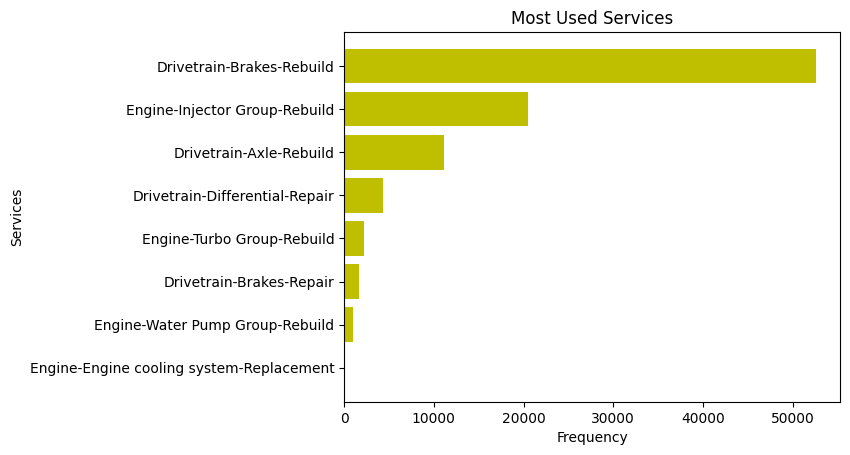

In [ ]:
most_serviced = df['SERVICE']
counts = most_serviced.value_counts()
sorted_counts = counts.sort_values(ascending=True)

plt.barh(sorted_counts.index, sorted_counts.values,color='y')
plt.xlabel('Frequency')
plt.ylabel('Services')
plt.title('Most Used Services')
plt.show()

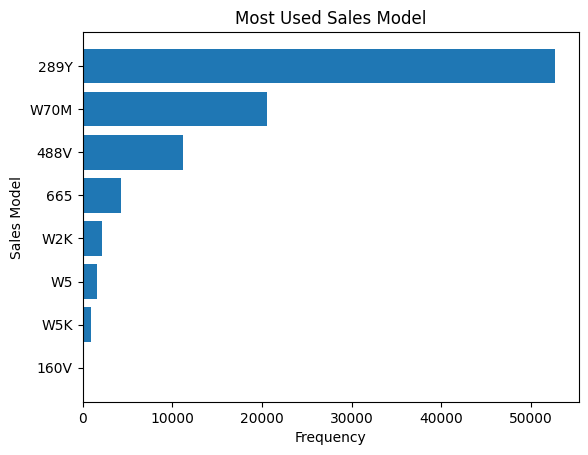

In [ ]:
most_serviced = df['SALES_MODEL']
counts = most_serviced.value_counts()
sorted_counts = counts.sort_values(ascending=True)

plt.barh(sorted_counts.index, sorted_counts.values)
plt.xlabel('Frequency')
plt.ylabel('Sales Model')
plt.title('Most Used Sales Model')
plt.show()

In [ ]:
column_has_null = df['PART_NAME'].isnull().any()
print(column_has_null)


False


In [ ]:
num_rows_with_null = df['PART_NAME'].isnull().sum()
print(num_rows_with_null)

0


In [ ]:
df=df.dropna()
df.head()

,INVOICE_ID,INVOICE_DATE,PART_NUMBER,SERVICE,PART_NAME,SALES_MODEL,day_inv,month_inv,year_inv,User_ID,PART_ID
0,U370/9670114009-3350006692,17-06-2020,5O7126,Drivetrain-Brakes-Rebuild,Screen Filters,289Y,17,6,2020,14808,141
1,M060/M060-3073812939,30-04-2020,3N6968,Drivetrain-Brakes-Rebuild,Gaskets,289Y,30,4,2020,6403,68
2,U370/9670558168-3300504198,20-07-2021,1U0931,Drivetrain-Brakes-Rebuild,"Seals, Gaskets, and O-Rings",289Y,20,7,2021,16365,143
3,W700/CTS33550363,14-08-2020,0L0181,Drivetrain-Axle-Rebuild,Bolts and Screws,488V,14,8,2020,19608,13
5,E050/003503232507,25-01-2019,3090952,Drivetrain-Brakes-Rebuild,Kit - Drivetrain and Steering,289Y,25,1,2019,2214,97


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df.loc[:, 'User_ID']=le.fit_transform(df['INVOICE_ID'])

In [ ]:
df.loc[:, 'PART_ID']=le.fit_transform(df['PART_NAME'])

In [ ]:
df

,INVOICE_ID,INVOICE_DATE,PART_NUMBER,SERVICE,PART_NAME,SALES_MODEL,day_inv,month_inv,year_inv,User_ID,PART_ID
0,U370/9670114009-3350006692,17-06-2020,5O7126,Drivetrain-Brakes-Rebuild,Screen Filters,289Y,17,6,2020,14808,141
1,M060/M060-3073812939,30-04-2020,3N6968,Drivetrain-Brakes-Rebuild,Gaskets,289Y,30,4,2020,6403,68
2,U370/9670558168-3300504198,20-07-2021,1U0931,Drivetrain-Brakes-Rebuild,"Seals, Gaskets, and O-Rings",289Y,20,7,2021,16365,143
3,W700/CTS33550363,14-08-2020,0L0181,Drivetrain-Axle-Rebuild,Bolts and Screws,488V,14,8,2020,19608,13
5,E050/003503232507,25-01-2019,3090952,Drivetrain-Brakes-Rebuild,Kit - Drivetrain and Steering,289Y,25,1,2019,2214,97
...,...,...,...,...,...,...,...,...,...,...,...
94622,U370/8900080237,17-03-2020,4Q4763,Engine-Injector Group-Rebuild,Washers and Spacers,W70M,17,3,2020,14110,183
94623,P580/77721960,16-12-2022,4W2488,Drivetrain-Brakes-Rebuild,"Seals, Gaskets, and O-Rings",289Y,16,12,2022,11166,143
94624,W180/TSJ07347743,31-01-2020,5W7699,Drivetrain-Brakes-Rebuild,"Seals, Gaskets, and O-Rings",289Y,31,1,2020,19064,143
94625,E050/007701151407,30-10-2020,9C1843,Drivetrain-Brakes-Rebuild,"Seals, Gaskets, and O-Rings",289Y,30,10,2020,2867,143


In [ ]:
col=[]
for i in range(1,191):
  col.append('Part_{}'.format(i))
print(col)

['Part_1', 'Part_2', 'Part_3', 'Part_4', 'Part_5', 'Part_6', 'Part_7', 'Part_8', 'Part_9', 'Part_10', 'Part_11', 'Part_12', 'Part_13', 'Part_14', 'Part_15', 'Part_16', 'Part_17', 'Part_18', 'Part_19', 'Part_20', 'Part_21', 'Part_22', 'Part_23', 'Part_24', 'Part_25', 'Part_26', 'Part_27', 'Part_28', 'Part_29', 'Part_30', 'Part_31', 'Part_32', 'Part_33', 'Part_34', 'Part_35', 'Part_36', 'Part_37', 'Part_38', 'Part_39', 'Part_40', 'Part_41', 'Part_42', 'Part_43', 'Part_44', 'Part_45', 'Part_46', 'Part_47', 'Part_48', 'Part_49', 'Part_50', 'Part_51', 'Part_52', 'Part_53', 'Part_54', 'Part_55', 'Part_56', 'Part_57', 'Part_58', 'Part_59', 'Part_60', 'Part_61', 'Part_62', 'Part_63', 'Part_64', 'Part_65', 'Part_66', 'Part_67', 'Part_68', 'Part_69', 'Part_70', 'Part_71', 'Part_72', 'Part_73', 'Part_74', 'Part_75', 'Part_76', 'Part_77', 'Part_78', 'Part_79', 'Part_80', 'Part_81', 'Part_82', 'Part_83', 'Part_84', 'Part_85', 'Part_86', 'Part_87', 'Part_88', 'Part_89', 'Part_90', 'Part_91', 'Part_9

In [ ]:
uni_userid=df['User_ID'].unique()
uni_userid

array([14808,  6403, 16365, ...,   963, 13424, 12303])

In [ ]:
uni_partid=df['PART_ID'].unique()
max_order=0
for id in uni_partid:
  matched_products = df.loc[df['PART_ID'] == id,'PART_NAME']
  max_order=max(max_order,len(matched_products.tolist()))
  print(f"{matched_products.tolist()[0]} order count - {len(matched_products.tolist())}")
max_order

Screen Filters order count - 175
Gaskets order count - 1922
Seals, Gaskets, and O-Rings order count - 23470
Bolts and Screws order count - 6649
Kit - Drivetrain and Steering order count - 3245
Washers and Spacers order count - 4608
Shims order count - 660
Caps and Plugs order count - 3206
Impellers order count - 36
Clamps and Clips order count - 5360
Hose Assemblies order count - 3487
Housings and Covers order count - 6
Grommets order count - 733
Fasteners Nuts order count - 1604
Hose adapters order count - 2856
Bearings order count - 2670
Kit - Maintenance order count - 6492
Kit - Engines order count - 265
Springs order count - 1818
Water Pumps order count - 270
Rotating Seals order count - 480
Pins order count - 541
Injectors order count - 338
Valve Cartridges order count - 1084
Information Films order count - 257
Rings order count - 6
Grease order count - 3612
Valve Components order count - 715
Driveshafts and Joint Groups order count - 2547
Friction Discs order count - 920
Kit - Hy

23470

In [ ]:
matched_products = df.loc[df['User_ID'] == 14808, 'PART_ID']
matched_products.tolist()

[141, 52, 143, 143, 143, 143, 1, 143, 101, 20, 143, 143, 88]

In [ ]:
dict={}
count=1
for id in uni_userid:
    col=count
    matched_products = df.loc[df['User_ID'] == id, 'PART_ID']
    dict[col]=matched_products.tolist()
    count+=1
    print(f"ID: {id}, Products: {matched_products.tolist()}")

Streaming output truncated to the last 5000 lines.
ID: 9100, Products: [109]
ID: 4342, Products: [97]
ID: 13180, Products: [72]
ID: 12990, Products: [50]
ID: 4914, Products: [114]
ID: 8311, Products: [97]
ID: 1035, Products: [72]
ID: 2006, Products: [184]
ID: 6892, Products: [50]
ID: 1037, Products: [72]
ID: 19515, Products: [72]
ID: 12144, Products: [114, 97, 39, 97, 151, 78]
ID: 2227, Products: [97]
ID: 8865, Products: [97]
ID: 2832, Products: [143]
ID: 1347, Products: [72]
ID: 4119, Products: [72]
ID: 17121, Products: [101, 101]
ID: 4988, Products: [156]
ID: 14820, Products: [143, 143, 143, 20, 101, 143, 143, 143]
ID: 20002, Products: [13]
ID: 15509, Products: [97]
ID: 6239, Products: [50]
ID: 8718, Products: [10]
ID: 14472, Products: [97]
ID: 19203, Products: [86]
ID: 17100, Products: [179, 101]
ID: 6500, Products: [97]
ID: 15643, Products: [101]
ID: 2049, Products: [72]
ID: 17166, Products: [101]
ID: 5361, Products: [13, 50]
ID: 2695, Products: [97]
ID: 12005, Products: [80, 6]
ID

In [ ]:
prod_dict = {key: value for key, value in dict.items()}

In [ ]:
for key, value in prod_dict.items():
    prod_dict[key] = value[:25]

In [ ]:
part_dict = {key: lst + [143] * (25 - len(lst)) for key, lst in prod_dict.items()}

In [ ]:
part_dict[1]

[141,
 52,
 143,
 143,
 143,
 143,
 1,
 143,
 101,
 20,
 143,
 143,
 88,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143]

In [ ]:
col=[]
for i in range(0,21190):
  col.append(f"U{i+1}")


In [ ]:
upd_df = pd.DataFrame.from_dict(part_dict)
upd_df.columns=col
upd_df

In [ ]:
col_p=[]
for i in range(0,25):
  col_p.append(f"P{i+1}")

In [ ]:
upd_df=upd_df.transpose()
upd_df.columns=col_p
upd_df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25
U1,141,52,143,143,143,143,1,143,101,20,...,143,143,143,143,143,143,143,143,143,143
U2,68,143,27,143,126,143,143,61,156,13,...,143,143,143,143,143,143,156,27,143,80
U3,143,143,143,143,143,51,143,143,30,101,...,10,143,30,143,100,150,143,143,143,30
U4,13,143,50,143,183,13,143,50,183,143,...,30,80,13,20,143,143,143,143,143,143
U5,97,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U21186,97,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143
U21187,72,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143
U21188,72,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143
U21189,72,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
input_category = 'Seals, Gaskets, and O-Rings'
encoded_value = le.transform([input_category])[0]

print(f"Encoded value for '{input_category}': {encoded_value}")

Encoded value for 'Seals, Gaskets, and O-Rings': 143


In [ ]:
items=[]
for i in df['PART_NAME'].unique():
  items.append(i)
print("Items available are\n")
for item in items:
  print(item)

Items available are

Screen Filters
Gaskets
Seals, Gaskets, and O-Rings
Bolts and Screws
Kit - Drivetrain and Steering
Washers and Spacers
Shims
Caps and Plugs
Impellers
Clamps and Clips
Hose Assemblies
Housings and Covers
Grommets
Fasteners Nuts
Hose adapters
Bearings
Kit - Maintenance
Kit - Engines
Springs
Water Pumps
Rotating Seals
Pins
Injectors
Valve Cartridges
Information Films
Rings
Grease
Valve Components
Driveshafts and Joint Groups
Friction Discs
Kit - Hydraulics
Retaining Rings
Thrust Washers
Bars, Plates and Strips
Transmission Cases
Fasteners Studs
Solid Rods
Duo Cone Group
Brake Groups
Planet Carriers
Dowel Pins
Controls-Switching
Joystick Components
Breathers
Tubes
Tanks
Hydraulics Filter Components
Temperature Sensors
Mounts
Bearing Housings
No Data
Hyd Cylinder Piston
Separator Plates
Valve Groups and Assemblies
Brake Valves
Shafts
Fasteners Rivets
Connector
Fluid Filter
Hubs
Housing
Yoke Assemblies
Master Cylinders
Manually Operated Valves
Turbos and Turbo Groups
Plan

In [ ]:
def append_row_to_DF(inp):
  default_value = 143
  desired_length = 25
  ori=inp.copy()
  append_row=inp.copy()
  append_row += [default_value] * (desired_length - len(append_row))
  inp=ori.copy()
  n=len(part_dict)
  part_dict[n]=append_row
  n+=1

In [ ]:
def add_cart():
  inp = []
  for i in range(0, 4):
      input_category = input("Enter Part Name: ")
      encoded_value = le.transform([input_category])[0]
      inp.append(encoded_value)
  print("Do you want some other things in cart? y (or) n")
  check=input()
  while check=='y':
    inp.pop(0)
    input_category = input("Enter Part Name: ")
    encoded_value = le.transform([input_category])[0]
    inp.append(encoded_value)
    print("Anything else?")
    check=input()
  append_row_to_DF(inp)
  return inp

In [ ]:
def top_recom(inp):
  uinp=np.array(inp).reshape(1, -1)
  ans={}
  sim=[]
  for i in range(1,len(part_dict)+1):
    ds=np.array(part_dict[i][0:4]).reshape(1,-1)
    similarity = cosine_similarity(uinp,ds)
    ans[similarity[0][0]]=part_dict[i][5:25]
    sim.append(similarity[0][0])
  sim=sorted(sim,reverse=True)
  hset=set()
  count=0
  for i in range(0,100):
    for j in range(5,10):
      if ans[sim[i]][j] in hset:
        if count>=10:
          break
        continue
      else:
        hset.add(ans[sim[i]][j])
        count+=1
      if count>=10:
        break
    if count>=10:
        break
  for i in inp:
    if i in hset:
      hset.remove(i)
  j=0
  print("\n\nYou can have a look at these products.\n\nTop 5 Recommendations:")
  for id in hset:
    print(f"{j+1}. {recom[id]}")
    j+=1
    if j==5:
      break


In [ ]:
inp=add_cart()
top_recom(inp)

Enter Part Name: Cooling Tanks
Enter Part Name: Rod Eye
Enter Part Name: P&M Gears and Gear Assemblies
Enter Part Name: Fuel Pumps
Do you want some other things in cart? y (or) n
y
Enter Part Name: P&M Pressure Plates and Blocks
Anything else?
n


You can have a look at these products.

Top 5 Recommendations:
1. Friction Discs
2. Seals, Gaskets, and O-Rings
3. Dowel Pins
4. Separator Plates
5. Valve Components


In [ ]:
def add_more_users():
  print("Want to add any parts to the cart? y (or) n")
  y_or_n=input()
  while y_or_n=='y':
    inp=add_cart()
    top_recom(inp)
    y_or_n=input()

In [ ]:
add_more_users()

In [ ]:
recom={}
for i in df['PART_NAME'].unique():
  encod_value = le.transform([i])[0]
  recom[encod_value]=i